### IMPORT LIBRARIES

The First step of this project is to import all the libraries that will be used in this project.


In [15]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [5]:
# import the data to b usd 
df = pd.read_csv('../data/heart_disease_preprocessed.csv')

# print the first 5 rows
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


## Feature scaling
In this project, I will use the StandardScaler library to scale the features. All values are between 0 and 1.


In [6]:
# create a scaler object
scaler = StandardScaler()

# scale the data 
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)




In [7]:
df_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.948726,0.686202,-2.251775,0.757525,-0.264900,2.394438,1.016684,0.017197,-0.696631,1.087338,2.274579,-0.723095,0.655818,-0.764198
1,1.392002,0.686202,0.877985,1.611220,0.760415,-0.417635,1.016684,-1.821905,1.435481,0.397182,0.649113,2.503851,-0.898522,0.866450
2,1.392002,0.686202,0.877985,-0.665300,-0.342283,-0.417635,1.016684,-0.902354,1.435481,1.346147,0.649113,1.428203,1.173931,0.051126
3,-1.932564,0.686202,-0.165268,-0.096170,0.063974,-0.417635,-0.996749,1.637359,-0.696631,2.122573,2.274579,-0.723095,-0.898522,-0.764198
4,-1.489288,-1.457296,-1.208521,-0.096170,-0.825922,-0.417635,1.016684,0.980537,-0.696631,0.310912,-0.976352,-0.723095,-0.898522,-0.764198


### Apply K-means Clustering
- Determine the optimal number of clusters (k) using the elbow method and silhouette score.
- Apply K-means clustering to the dataset.

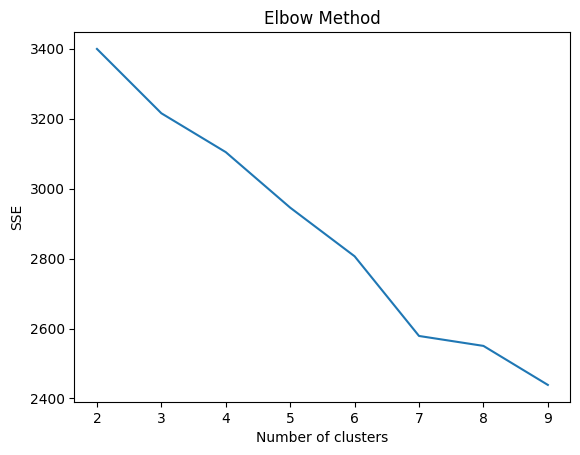

Silhouette Score for K-means: 0.12033982952350207


In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Find optimal k using elbow method
sse = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(2, 10), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

# Fit K-means with optimal k (e.g., k = 3)
optimal_k = 3  # Based on elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

# Calculate silhouette score
sil_score = silhouette_score(df_scaled, kmeans_labels)
print(f'Silhouette Score for K-means: {sil_score}')


### Hierarchical Clustering

- Apply hierarchical clustering (e.g., Agglomerative clustering) and create dendrograms to visualize cluster hierarchy.



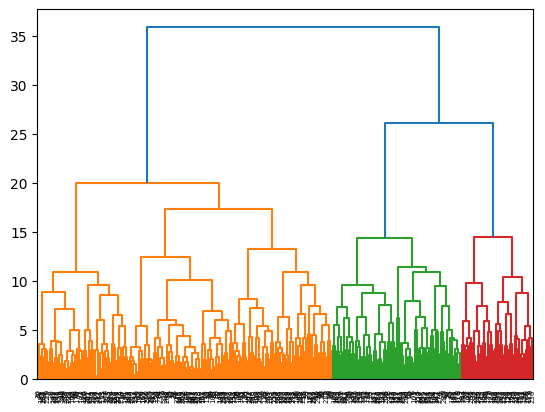

Silhouette Score for Hierarchical Clustering: 0.17925118780404684


In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Hierarchical clustering
linked = linkage(df_scaled, method='ward')
dendrogram(linked)
plt.show()

# Fit Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=optimal_k)
agg_labels = agg_clust.fit_predict(df_scaled)

# Calculate silhouette score
sil_score_agg = silhouette_score(df_scaled, agg_labels)
print(f'Silhouette Score for Hierarchical Clustering: {sil_score_agg}')


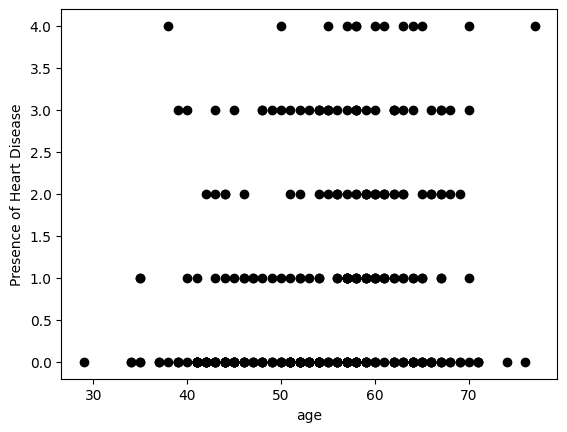

In [14]:
X = df[["age"]]
y = df[["num"]]
#Visualise data points
plt.scatter(X["age"],y["num"],c='black')
plt.xlabel('age')
plt.ylabel('Presence of Heart Disease')
plt.show()

### Clustering our Dataset 

- Apply K-means Clustering and Hierarchical Clustering to the dataset.
- kmeans function and fit it on the data



In [16]:
# drop the target column
X = df.drop('num', axis=1)
y = df['num']

# scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(X_scaled)

KMeans(n_clusters=2)

In [18]:
# see th ffitted clusters
kmeans.labels_

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,

In [19]:
kmeans.inertia_


3260.076801686905

### Determine the optimum number of clusters
We will first fit multiple k-means models, and in each successive model, we will increase the number of clusters.



Text(0, 0.5, 'Inertia')

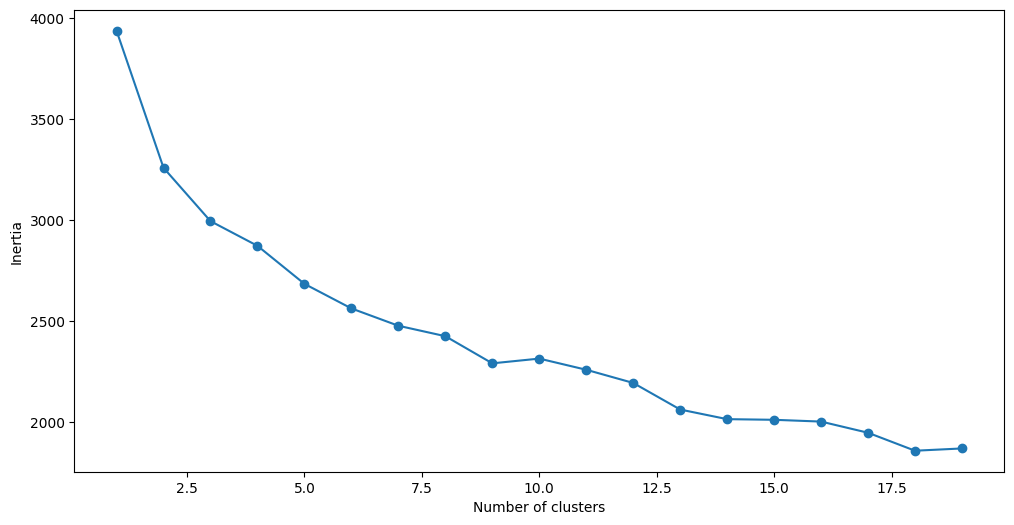

In [21]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(X_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

### Set the number of clusters 
- Set the number of clusters as 5 and fit the model


In [22]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 5, init='k-means++')
kmeans.fit(X_scaled)
pred = kmeans.predict(X_scaled)

### Value count of points
- Value count of points in each of the above-formed clusters


In [23]:
frame = pd.DataFrame(X_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

cluster
2    83
0    68
1    64
4    63
3    25
Name: count, dtype: int64

## Dimensionality Reduction: PCA and t-SNE 
- Using principal component analysis (PCA) and t-SNE to visualize the clusters and gain insights into the relationships between the variables.

### Using PCA to Visualize the Clusters
- In the PCA plot, the red "X" markers represent the centroids of the clusters.



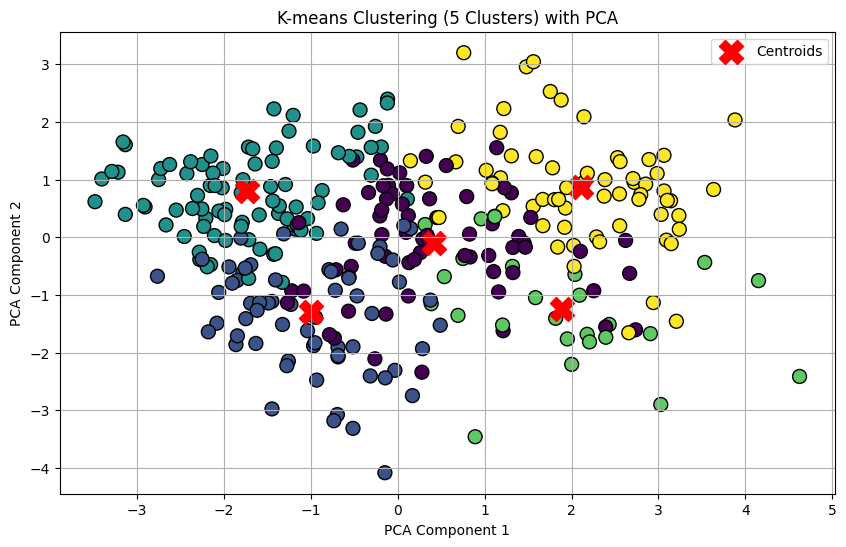

In [29]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce the data to 2 dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pred, cmap='viridis', marker='o', edgecolor='k', s=100)

# Plot the cluster centers
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=300, marker='X', label='Centroids')

plt.title('K-means Clustering (5 Clusters) with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()


### Using t-SNE for a Non-Linear Projection
- In the t-SNE plot, centroids aren't typically plotted, as t-SNE is non-linear, but the color-coding will show which cluster each point belongs to.

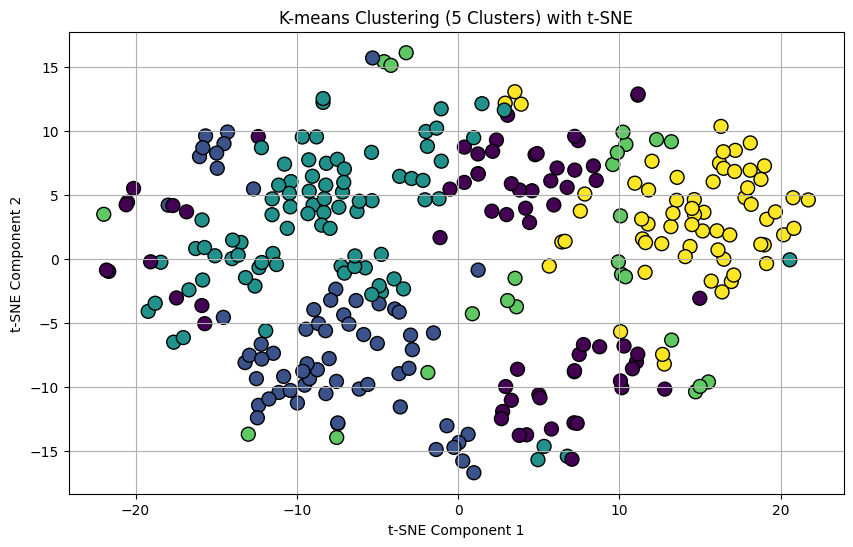

In [30]:
from sklearn.manifold import TSNE

# Reduce data to 2 dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=pred, cmap='viridis', marker='o', edgecolor='k', s=100)

# Plot the cluster centers (t-SNE does not directly provide transformed centers, so we skip centers here)
plt.title('K-means Clustering (5 Clusters) with t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()


## Gaussian Mixture Model (GMM) for Heart Disease Risk Factors

Apply GMM to model the probability distribution of the data and identify risk factors for heart disease.


In [39]:
from sklearn.mixture import GaussianMixture


X_array = np.array(X_scaled)


# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(X_array)

# Predict the clusters
gmm_labels = gmm.predict(X_array)
print(gmm_labels)


[4 3 1 1 2 1 0 2 1 4 1 2 4 1 4 1 1 1 2 1 1 4 1 1 1 2 2 2 1 1 2 4 1 1 1 1 1
 3 1 4 0 1 2 4 2 1 1 1 4 4 2 1 1 1 1 1 1 1 1 1 3 2 1 4 1 1 1 1 1 1 2 0 1 1
 1 2 1 2 1 1 1 2 1 4 1 1 1 2 2 2 1 0 1 2 2 1 1 0 1 1 1 1 2 4 1 1 1 1 1 1 3
 4 1 0 3 1 4 2 4 1 4 0 1 1 4 2 0 1 1 2 1 1 1 1 2 2 1 1 1 4 1 1 4 1 1 1 0 1
 1 2 4 2 2 1 1 1 1 1 1 1 4 3 2 2 4 1 1 4 1 2 1 1 2 2 1 3 4 1 1 4 1 0 1 1 2
 2 4 1 1 1 1 3 4 0 2 1 4 2 2 1 2 2 4 3 1 3 1 1 1 2 2 1 1 0 1 1 2 2 2 1 2 2
 2 1 2 2 1 2 1 1 2 0 1 2 2 1 4 1 2 1 1 2 2 1 4 1 1 1 1 4 1 1 1 2 1 2 2 2 1
 1 2 4 2 1 1 1 4 4 1 1 1 1 3 2 1 1 2 2 1 2 1 1 3 1 1 1 0 1 1 1 1 2 1 1 2 1
 0 3 1 0 1 2 1]


In [41]:
# Identify risk factors (features that have high variance)

gmm_probs = gmm.predict_proba(X_array)


In [42]:
gmm_probs

array([[0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 1.00000000e+000],
       [3.84950475e-022, 2.02253077e-004, 0.00000000e+000,
        9.99797747e-001, 0.00000000e+000],
       [2.59602852e-021, 1.00000000e+000, 0.00000000e+000,
        3.71076315e-025, 0.00000000e+000],
       ...,
       [1.93046138e-025, 1.00000000e+000, 0.00000000e+000,
        1.58766608e-143, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 1.00000000e+000,
        0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000]])

In [50]:
gmm_risk_factors = np.argmax(gmm_probs, axis=1)

In [51]:
gmm_risk_factors

array([4, 3, 1, 1, 2, 1, 0, 2, 1, 4, 1, 2, 4, 1, 4, 1, 1, 1, 2, 1, 1, 4,
       1, 1, 1, 2, 2, 2, 1, 1, 2, 4, 1, 1, 1, 1, 1, 3, 1, 4, 0, 1, 2, 4,
       2, 1, 1, 1, 4, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 4, 1, 1,
       1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 4, 1, 1, 1, 2,
       2, 2, 1, 0, 1, 2, 2, 1, 1, 0, 1, 1, 1, 1, 2, 4, 1, 1, 1, 1, 1, 1,
       3, 4, 1, 0, 3, 1, 4, 2, 4, 1, 4, 0, 1, 1, 4, 2, 0, 1, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 0, 1, 1, 2, 4, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 4, 3, 2, 2, 4, 1, 1, 4, 1, 2, 1, 1, 2, 2, 1, 3,
       4, 1, 1, 4, 1, 0, 1, 1, 2, 2, 4, 1, 1, 1, 1, 3, 4, 0, 2, 1, 4, 2,
       2, 1, 2, 2, 4, 3, 1, 3, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 0, 1, 2, 2, 1, 4, 1, 2, 1, 1, 2,
       2, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 4, 2, 1,
       1, 1, 4, 4, 1, 1, 1, 1, 3, 2, 1, 1, 2, 2, 1, 2, 1, 1, 3, 1, 1, 1,
       0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 0, 3, 1, 0, 1,

In [52]:
# Get the means of each component (cluster)
gmm_means = gmm.means_

# Get the covariances (how much the features vary within each component)
gmm_covariances = gmm.covariances_

# Risk factors: For each cluster, the features with the highest mean values
risk_factors_per_cluster = np.argsort(np.abs(gmm_means), axis=1)[:, ::-1]

# Show the top risk factors for each cluster
for i in range(gmm_means.shape[0]):
    print(f"Top risk factors for cluster {i}:")
    for feature_idx in risk_factors_per_cluster[i, :3]:  # Top 3 features
        print(f"Feature: {df.columns[feature_idx]}, Mean: {gmm_means[i, feature_idx]}")



Top risk factors for cluster 0:
Feature: ca, Mean: 1.4953472276659707
Feature: trestbps, Mean: 1.3240935961739817
Feature: oldpeak, Mean: 1.312911619988361
Top risk factors for cluster 1:
Feature: sex, Mean: 0.686202438357491
Feature: fbs, Mean: -0.4176345347922779
Feature: thal, Mean: 0.24010944867092776
Top risk factors for cluster 2:
Feature: sex, Mean: -1.4572959000169396
Feature: thal, Mean: -0.8572427104886656
Feature: fbs, Mean: -0.4176345347922781
Top risk factors for cluster 3:
Feature: exang, Mean: 1.115730745168363
Feature: thalach, Mean: -1.079681457954006
Feature: thal, Mean: 0.769278991020637
Top risk factors for cluster 4:
Feature: fbs, Mean: 2.3944379994757297
Feature: cp, Mean: -0.3391461881193998
Feature: sex, Mean: 0.2694099207373278


## explaination for the different clusters

Here's an explanation of the risk factors identified for each cluster based on the Gaussian Mixture Model results:

### **Cluster 0:**
- **ca** (number of major vessels colored by fluoroscopy, a measure of coronary artery disease): Mean value of 1.495 suggests that individuals in this cluster likely have a higher number of blocked vessels, which is a strong indicator of advanced heart disease.
- **trestbps** (resting blood pressure): Elevated resting blood pressure (mean 1.324) could indicate hypertension, a major risk factor for heart disease.
- **oldpeak** (ST depression induced by exercise relative to rest): A higher oldpeak (mean 1.313) suggests ischemia, which means that the heart isn't getting enough blood during exercise.

**Conclusion for Cluster 0**: Patients in this cluster are likely to have advanced coronary artery disease and high blood pressure, leading to significant cardiovascular risk during stress or exercise.

---

### **Cluster 1:**
- **sex** (1 = male; 0 = female): Mean value of 0.686 means that the cluster is predominantly male. Men are generally at higher risk of heart disease compared to women, especially at a younger age.
- **fbs** (fasting blood sugar > 120 mg/dl): Negative mean (-0.418) suggests that individuals in this cluster are less likely to have high fasting blood sugar, so diabetes may not be a significant risk in this cluster.
- **thal** (thalassemia test result): A lower positive value (0.240) suggests that this cluster might have a mild abnormality in the thalassemia test, which can indicate heart issues.

**Conclusion for Cluster 1**: This cluster represents mostly males, and while blood sugar levels seem less problematic, abnormal thalassemia test results could indicate underlying heart issues.

---

### **Cluster 2:**
- **sex**: Mean value of -1.457 indicates that this cluster is predominantly female.
- **thal**: Negative mean (-0.857) suggests more abnormal thalassemia test results in this cluster, which can be associated with heart disease.
- **fbs**: Similar to Cluster 1, this cluster shows a negative mean (-0.418), indicating lower likelihood of diabetes.

**Conclusion for Cluster 2**: This cluster primarily consists of females with abnormal thalassemia results. Although fasting blood sugar isn't a major concern here, there may be other heart health risks related to thalassemia.

---

### **Cluster 3:**
- **exang** (exercise-induced angina): Positive mean (1.116) suggests that individuals in this cluster frequently experience chest pain during exercise, which is a strong indicator of coronary artery blockages.
- **thalach** (maximum heart rate achieved): A negative mean (-1.080) indicates that people in this cluster tend to have lower maximum heart rates during exercise, which is another indicator of heart disease.
- **thal**: The mean value (0.769) suggests that this cluster has more abnormal thalassemia test results.

**Conclusion for Cluster 3**: Patients in this cluster are likely experiencing chest pain during exercise and have a reduced ability to achieve a high heart rate, both of which are strong signs of coronary artery disease. They also have abnormal thalassemia results.

---

### **Cluster 4:**
- **fbs**: A high positive mean (2.394) indicates that this cluster has a strong prevalence of individuals with high fasting blood sugar, which is indicative of diabetes—a major risk factor for heart disease.
- **cp** (chest pain type): A negative mean (-0.339) suggests a lower incidence of certain types of chest pain in this cluster.
- **sex**: Mean value of 0.269 suggests that this cluster has a more balanced distribution of men and women.

**Conclusion for Cluster 4**: This cluster is characterized by a high prevalence of diabetes, with fewer individuals experiencing typical chest pain symptoms. Both men and women are represented, but the dominant risk factor here is elevated blood sugar levels.

---

### **General Insights**:
- **Cluster 0** has patients with severe heart disease (high blocked vessels, blood pressure, and exercise-induced ischemia).
- **Cluster 1** and **Cluster 2** represent primarily men and women respectively, with differing risks related to thalassemia and blood sugar.
- **Cluster 3** is characterized by patients experiencing chest pain during exercise, with poor heart rate response.
- **Cluster 4** has a significant diabetic population, where blood sugar control is the main risk factor.

Each cluster identifies different patient groups based on specific risk factors, which can help tailor medical treatments accordingly.

## Evaluate Clustering Performance

Use the Silhouette Score and Davies-Bouldin Index to evaluate the clustering performance for each algorithm.


In [53]:
from sklearn.metrics import davies_bouldin_score

# Silhouette score already calculated
db_index_kmeans = davies_bouldin_score(df_scaled, kmeans_labels)
db_index_agg = davies_bouldin_score(df_scaled, agg_labels)

print(f'Davies-Bouldin Index for K-means: {db_index_kmeans}')
print(f'Davies-Bouldin Index for Hierarchical Clustering: {db_index_agg}')


Davies-Bouldin Index for K-means: 2.7355535368176604
Davies-Bouldin Index for Hierarchical Clustering: 1.9985113107968957


## Comparison of Clustering Algorithms

- Compare the clustering algorithms based on their silhouette scores and Davies-Bouldin indices.
- Conclude which algorithm performed best and provide reasoning for the choice.


Based on the **Davies-Bouldin Index** values:

- **K-means: 2.74**
- **Hierarchical Clustering: 2.00**

The **Davies-Bouldin Index** measures how well clusters are separated and how compact they are. Lower values indicate better clustering performance, meaning the clusters are more compact and well-separated.

### Conclusion:
- The **Hierarchical Clustering** model (1.998) performs better than **K-means** (2.735) since it has a lower Davies-Bouldin Index. This suggests that the hierarchical clustering algorithm formed more distinct and compact clusters in your dataset compared to K-means.

Choosing between these two models based on the Davies-Bouldin Index alone, **Hierarchical Clustering** is the better option for this dataset.